In [51]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/Random Forest/Random Forest/g.csv')

# Display the first few rows of the dataset
print(data.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


In [52]:
data.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...   ...
994      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
995      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
996      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
997      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
998      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN

[999 rows x 10 columns]>

In [53]:
data.shape

(999, 10)

In [54]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [55]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [56]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


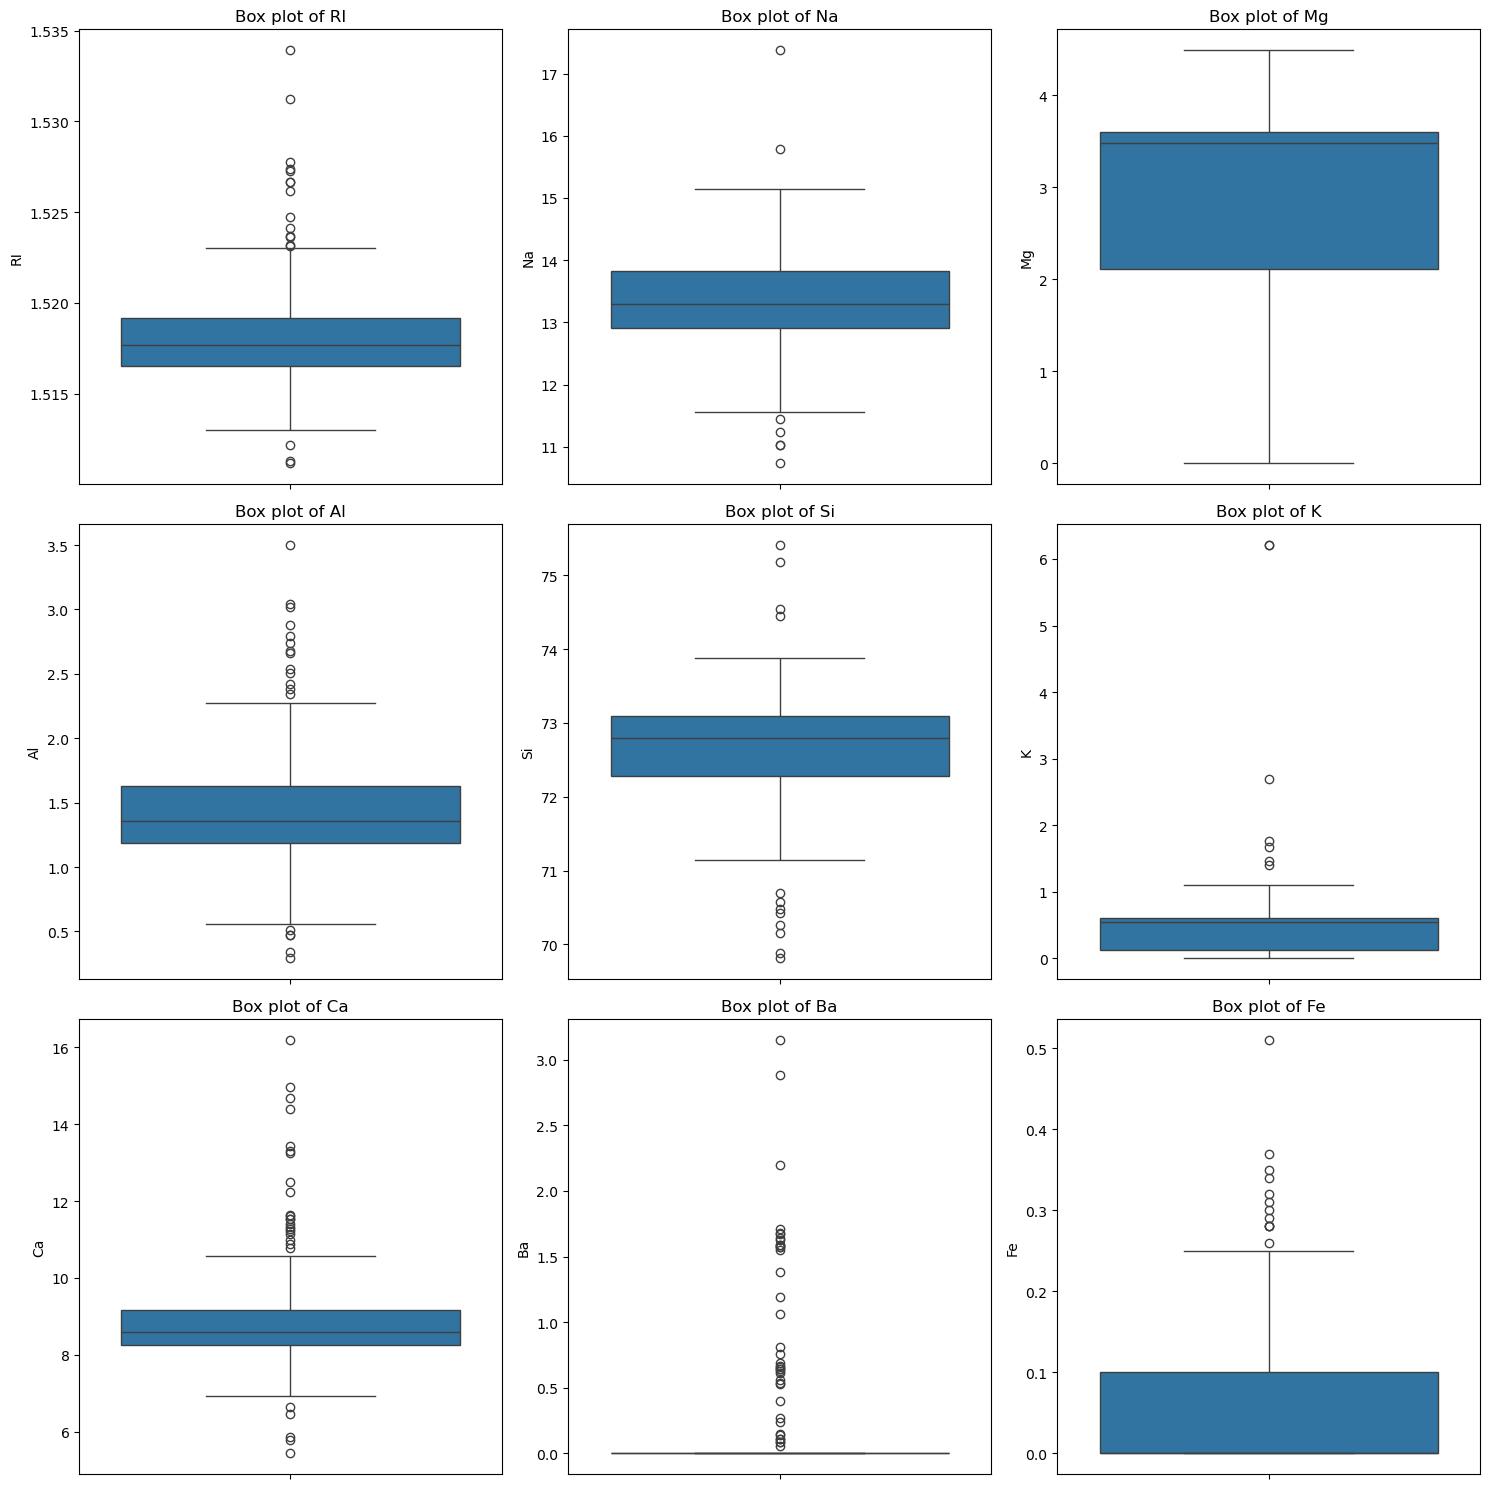

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
num_features = len(data.columns) - 1  # Exclude 'Type' column
cols = 3  # Number of columns for subplots
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows needed

plt.figure(figsize=(15, rows * 5))  # Adjust figure size based on number of rows

# Create box plots for each feature
for i, column in enumerate(data.columns[:-1]):  # Exclude 'Type' column
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [58]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 785


In [59]:
import pandas as pd


# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicates}")

# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Verify removal of duplicates
duplicates_after_removal = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after_removal}")

# Display the shape of the cleaned dataset
print(f"Shape of cleaned dataset: {data_cleaned.shape}")

Number of duplicate rows before removal: 785
Number of duplicate rows after removal: 0
Shape of cleaned dataset: (214, 10)


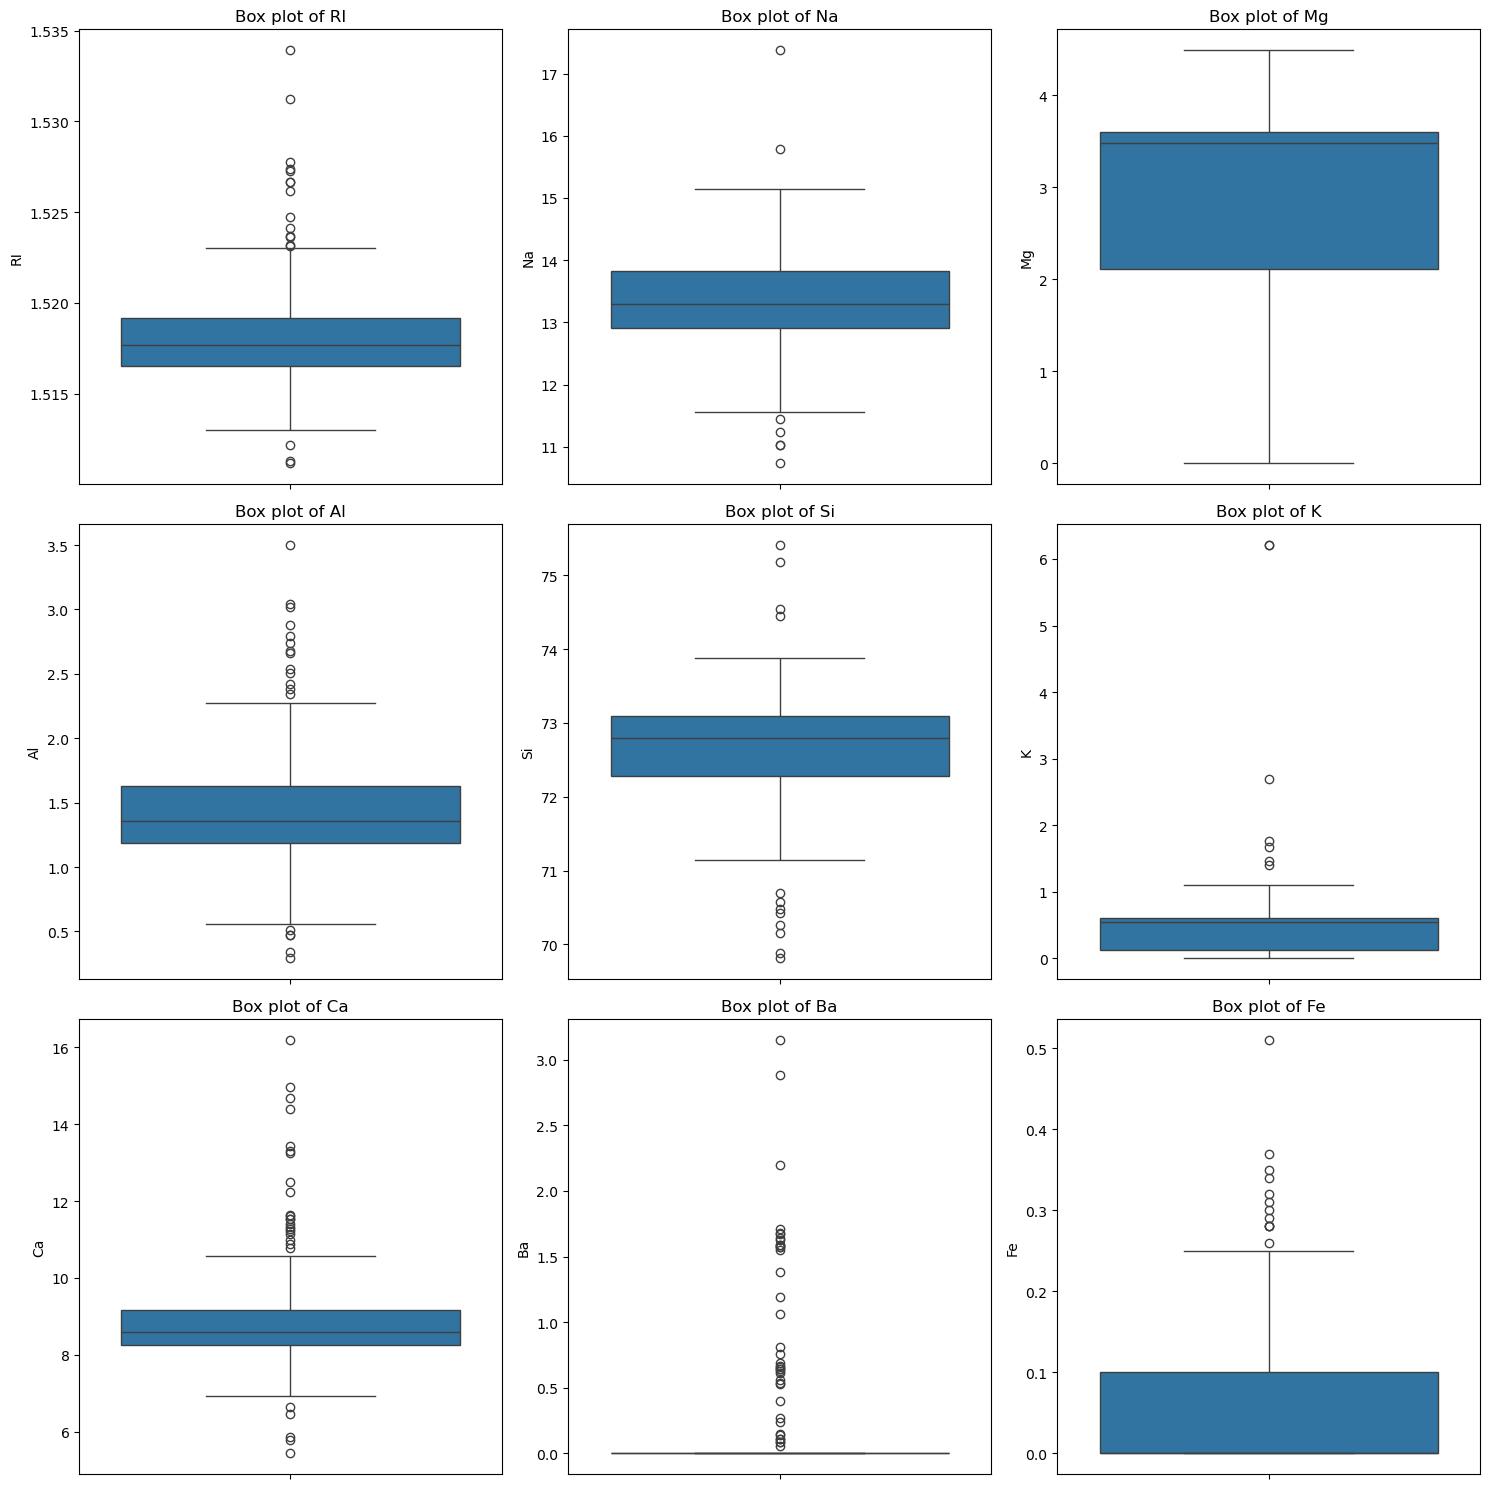

In [60]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, rows * 5))

# Create box plots for each feature
for i, column in enumerate(data.columns[:-1]):  # Exclude 'Type' column
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

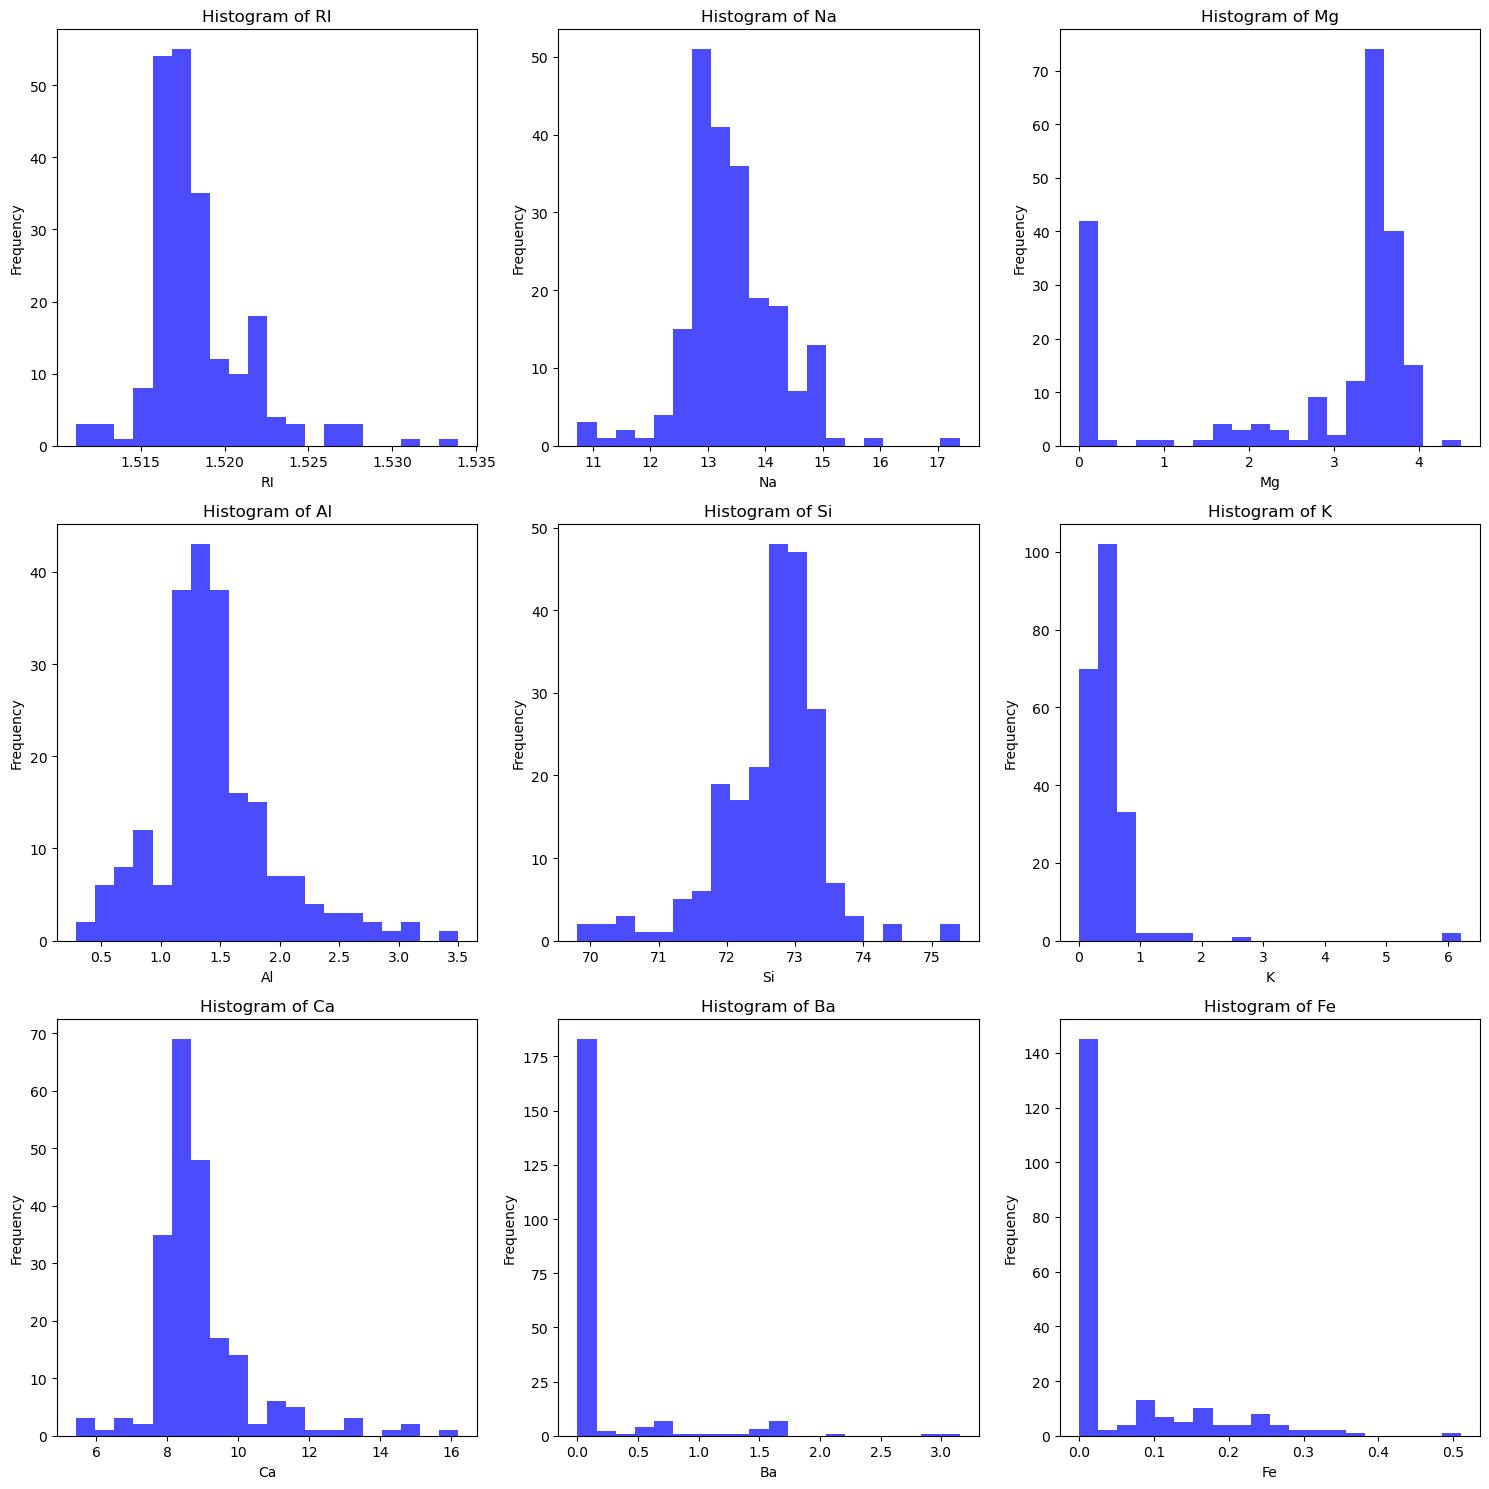

In [61]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
num_features = len(data.columns) - 1  # Exclude 'Type' column
cols = 3  # Number of columns for subplots
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows needed

plt.figure(figsize=(15, rows * 5))

# Create histograms for each feature
for i, column in enumerate(data.columns[:-1]):  # Exclude 'Type' column
    if data[column].dtype == 'bool':  # Check if the column is boolean
        continue  # Skip boolean columns
    plt.subplot(rows, cols, i + 1)
    plt.hist(data[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.


In [62]:
import pandas as pd


# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [63]:
# Impute missing values with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after = data.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after)

Missing Values After Imputation:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [69]:
categorical_columns = data.select_dtypes(include=['object']).columns


In [71]:
print(categorical_columns)

Index([], dtype='object')


Apply one-hot encoding:

In [72]:
# Apply one-hot encoding if categorical columns are present
if len(categorical_columns) > 0:
    data_encoded = pd.get_dummies(data, columns=categorical_columns)
else:
    data_encoded = data  # No categorical columns to encode

# Verify the result
print(data_encoded.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type_2.0  \
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     False   
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     False   
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     False   
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     False   
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     False   

   Type_2.7803738317757007  Type_3.0  Type_5.0  Type_6.0  Type_7.0  
0                    False     False     False     False     False  
1                    False     False     False     False     False  
2                    False     False     False     False     False  
3                    False     False     False     False     False  
4                    False     False     False     False     False  


3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [76]:
print(data.columns)


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_2.0',
       'Type_2.7803738317757007', 'Type_3.0', 'Type_5.0', 'Type_6.0',
       'Type_7.0'],
      dtype='object')


Step 1: Feature Scaling
You can use either Standardization (mean = 0, standard deviation = 1) or Normalization (scaling between 0 and 1) for feature scaling.

In [77]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale all features except the target column if necessary
features = data_encoded.drop(columns=['Type_7.0'])  # Replace 'Type' with your actual target column name
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
data_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add back the target column
data_scaled['Type_7.0'] = data_encoded['Type_7.0']


Normalization:

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale all features except the target column
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
data_normalized = pd.DataFrame(scaled_features, columns=features.columns)

# Add back the target column
data_normalized['Type_7.0'] = data_encoded['Type_7.0']


Step 2: Handling Imbalanced Data
If your target column (Type) is imbalanced, you can use SMOTE (Synthetic Minority Over-sampling Technique) or Random Under-Sampling.

SMOTE (Oversampling Minority Classes):

In [79]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data_scaled.drop(columns=['Type_7.0'])
y = data_scaled['Type_7.0']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Type_7.0'] = y_resampled


Random Under-Sampling (Downsampling Majority Classes):


In [80]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine resampled features and target
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Type_7.0'] = y_resampled


1. Divide the data into train and test split.


In [83]:
from sklearn.model_selection import train_test_split

# Assuming 'Type' is the target column
X = data_encoded.drop(columns=['Type_7.0'])  # Features
y = data_encoded['Type_7.0']                 # Target

# Split data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the shape of the split data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (799, 14) (799,)
Testing set shape: (200, 14) (200,)


 Implement a Random Forest Classifier using scikit-learn:



In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Classifier Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)


Random Forest Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       194
        True       1.00      1.00      1.00         6

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[194   0]
 [  0   6]]


3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training dataset
rf_classifier.fit(X_train, y_train)

# Predict on the test dataset
y_pred = rf_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# For detailed class-wise metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       194
        True       1.00      1.00      1.00         6

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Explanation of Metrics:
Accuracy: The ratio of correctly predicted instances to the total instances.
Precision: The ratio of true positive predictions to the total positive predictions.
Recall: The ratio of true positive predictions to the actual positives.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

In [ ]:
5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


1. Bagging with BaggingClassifier


In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Bagging Classifier with a Random Forest base estimator
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)

# Train the Bagging model
bagging_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Calculate performance metrics
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

# Print Bagging performance metrics
print("Bagging Classifier:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1 Score:", f1_bagging)


Bagging Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


2. Boosting with GradientBoostingClassifier


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the Boosting model
boosting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_boosting = boosting_classifier.predict(X_test)

# Calculate performance metrics
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

# Print Boosting performance metrics
print("\nBoosting Classifier:")
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)



Boosting Classifier:
Accuracy: 0.995
Precision: 0.9957142857142857
Recall: 0.995
F1 Score: 0.9951858477439873


Summary Comparison
To directly compare the results of Random Forest, Bagging, and Boosting, you could create a summary table of metrics:

In [89]:
import pandas as pd

# Create a summary DataFrame
results_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'Boosting'],
    'Accuracy': [accuracy, accuracy_bagging, accuracy_boosting],
    'Precision': [precision, precision_bagging, precision_boosting],
    'Recall': [recall, recall_bagging, recall_boosting],
    'F1 Score': [f1, f1_bagging, f1_boosting]
})

print("\nComparison of Models:\n", results_summary)



Comparison of Models:
            Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest     1.000   1.000000   1.000  1.000000
1        Bagging     1.000   1.000000   1.000  1.000000
2       Boosting     0.995   0.995714   0.995  0.995186


Explanation:
Bagging: Reduces variance by training multiple estimators on random subsets of data and aggregating their results.
Boosting: Reduces both bias and variance by training sequential estimators, where each corrects errors made by previous models.

Additional question:


1. Explain Bagging and Boosting methods. How is it different from each other.
Bagging (Bootstrap Aggregating):

Concept: Bagging is an ensemble learning technique that aims to reduce variance by training multiple instances of a model on different random subsets of the data.
Process: In Bagging, each model in the ensemble is trained independently on a randomly sampled subset of the data (with replacement), and the predictions are averaged (for regression) or majority-voted (for classification).
Example: Random Forest is a popular algorithm that uses bagging by training multiple decision trees on different data subsets and then averaging/voting on their predictions.
Advantage: It reduces overfitting and variance, making it suitable for high-variance, low-bias models like decision trees.
Boosting:

Concept: Boosting is an ensemble technique focused on reducing both bias and variance by sequentially training models, where each model corrects the errors of the previous ones.
Process: In Boosting, the models are trained sequentially. Initially, all data points have equal weight, but after each iteration, misclassified points are given higher weights so that subsequent models focus more on these "harder" examples. The final predictions are a weighted average or sum of the individual model predictions.
Example: Gradient Boosting and AdaBoost are two popular boosting algorithms.
Advantage: Boosting generally produces more accurate and robust models, especially for complex datasets.
Key Differences:
Independence vs. Sequential Training: Bagging trains models independently on random data subsets, while Boosting trains models sequentially, each correcting the previous.
Focus on Errors: Boosting adjusts weights to focus on harder-to-classify examples, while Bagging treats each sample equally.
Bias vs. Variance: Bagging reduces variance (effective for high-variance models), whereas Boosting reduces both bias and variance, making it powerful for more complex patterns.




2. Explain how to handle imbalance in the data.
Imbalanced data can be problematic, especially in classification, as the model might be biased towards the majority class. Here are common strategies to handle imbalance:

A. Resampling Techniques

Oversampling: Increase the number of instances of the minority class by duplicating them or creating synthetic examples (e.g., SMOTE – Synthetic Minority Over-sampling Technique).
Undersampling: Reduce the number of majority class instances by randomly removing them to balance the dataset.
B. Algorithmic Techniques

Class Weights: Many algorithms (like Random Forest, SVM) allow you to assign a higher weight to the minority class, making the algorithm pay more attention to it during training.
Use of Specialized Algorithms: Algorithms like BalancedRandomForestClassifier in imblearn are designed to work with imbalanced data by balancing class distributions automatically.
C. Evaluation Metrics

In imbalanced datasets, accuracy is not always reliable. Use metrics like precision, recall, F1-score, or area under the ROC curve (AUC) to better evaluate the model’s performance on minority classes.